# Sampling strategies



array([[<Axes: title={'center': 'FAM_Glas'}>,
        <Axes: title={'center': 'FAM_MRC'}>]], dtype=object)

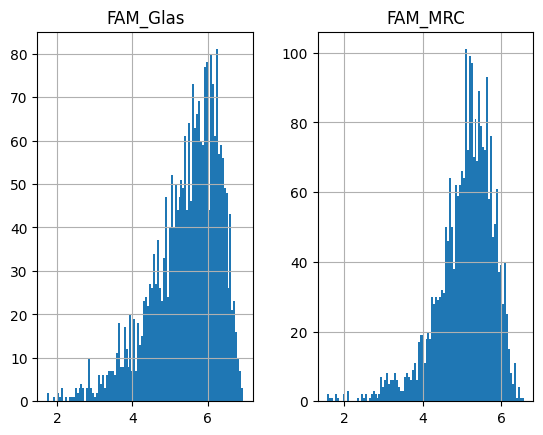

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

random_state = 42
df = pd.read_excel('Glasgow_MRC_joint_norms_inner_join_english.xlsx')

df[['FAM_Glas', 'FAM_MRC']].hist(bins=100)

## 1. Random

Number of words in train set: 1500
Number of words in test set: 1045


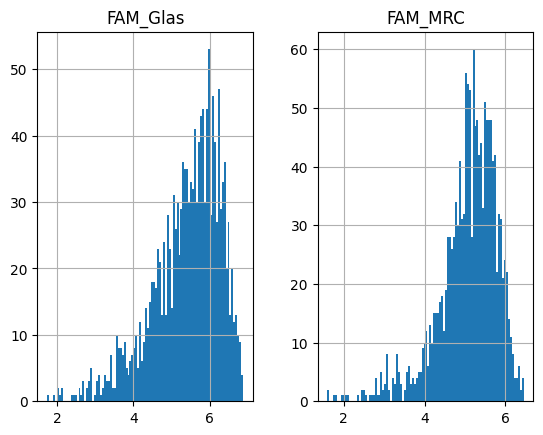

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split


df_1 = pd.read_excel('Glasgow_MRC_joint_norms_inner_join_english.xlsx')
df_1_train, df_1_test = train_test_split(df_1, test_size=0.41060, random_state=random_state)

print(f"Number of words in train set: {len(df_1_train)}")
print(f"Number of words in test set: {len(df_1_test)}")

df_1_train[['FAM_Glas', 'FAM_MRC']].hist(bins=100)

df_1_train['FAM_Glas_MRC_mean'] = ((df_1_train['FAM_Glas'] + df_1_train['FAM_MRC']) / 2).round(2)
df_1_test['FAM_Glas_MRC_mean'] = ((df_1_test['FAM_Glas'] + df_1_test['FAM_MRC']) / 2).round(2)

df_1_train.to_excel('1_train_random_MRC_Glas_n.xlsx', index=False)
df_1_test.to_excel('1_test_random_MRC_Glas_n.xlsx', index=False)




## 2. Diff Glass MRC

Number of words with diff >= 1: 259
Number of words with diff < 1: 2286
Number of words in train set: 1500
Number of words in test set: 1045


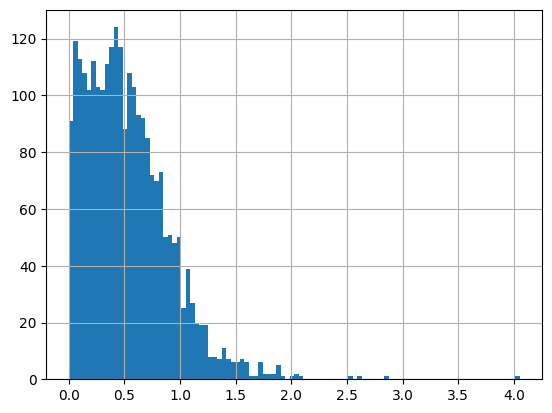

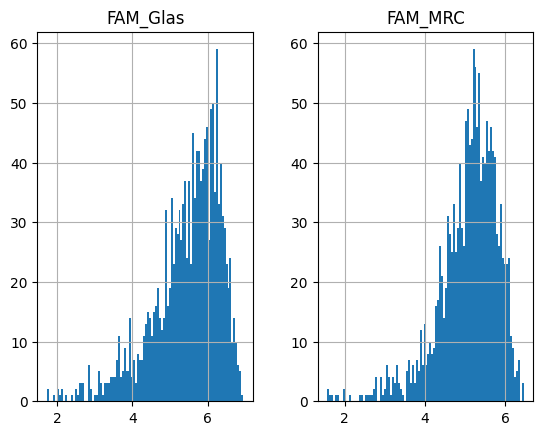

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split


df_2 = pd.read_excel('Glasgow_MRC_joint_norms_inner_join_english.xlsx')
df_2['diff'] = abs(df_2['FAM_Glas'] - df_2['FAM_MRC'])
df_2 = df_2.sort_values(by='diff', ascending=False)


df_2['diff'].hist(bins=100)

df_2_big_diffs = df_2[df_2['diff'] >= 1]
df_2_other = df_2[df_2['diff'] < 1]

print(f"Number of words with diff >= 1: {len(df_2_big_diffs)}")
print(f"Number of words with diff < 1: {len(df_2_other)}")

df_2_big_diffs_train, df_2_big_diffs_test = train_test_split(df_2_big_diffs, test_size=0.2, random_state=random_state)
df_2_big_diffs_train

df_2_other_train, df_2_other_test = train_test_split(df_2_other, test_size=0.434383, random_state=random_state)
df_2_other_train

df_2_train = pd.concat([df_2_big_diffs_train, df_2_other_train])
df_2_test = pd.concat([df_2_big_diffs_test, df_2_other_test])

print(f"Number of words in train set: {len(df_2_train)}")
print(f"Number of words in test set: {len(df_2_test)}")

df_2_train[['FAM_Glas', 'FAM_MRC']].hist(bins=100)

#reorder randomly
df_2_train = df_2_train.sample(frac=1, random_state=random_state).reset_index(drop=True)
df_2_test = df_2_test.sample(frac=1, random_state=random_state).reset_index(drop=True)


df_2_train['FAM_Glas_MRC_mean'] = ((df_2_train['FAM_Glas'] + df_2_train['FAM_MRC']) / 2).round(2)
df_2_test['FAM_Glas_MRC_mean'] = ((df_2_test['FAM_Glas'] + df_2_test['FAM_MRC']) / 2).round(2)

df_2_train.to_excel('2_train_diff_MRC_Glas.xlsx', index=False)
df_2_test.to_excel('2_test_diff_MRC_Glas.xlsx', index=False)


